# **Table of Contents**
* [Data Wrangling](#section_21)<br><br>
* [Discovering Clusters](#section_2)
    * [Finding best 'K'](#section_3)
    * [Using best 'K'](#section_4)
    * [Cluster labelling](#section_5)
    * [Viewing Clusters](#section_6)<br><br>
* [Inference from Clusters](#section_7)

In [1]:
import numpy             as np
import pandas            as pd
import matplotlib.pyplot as plt
import seaborn           as sns

import warnings
warnings.filterwarnings("ignore")

In [2]:
df  = pd.read_csv ("datasets/Tech support.csv")

df.sample(3)

,PROBLEM_TYPE,no_of_cases,Avg_pending_calls,Avg_resol_time
22,Fan speed varies at on its own,78,2.2,44
21,Battery does not last full 8 hrs,43,2.1,56
0,Temperature control not working,170,1.3,32


<a id='section_21'></a>
# **1 - Data Wrangling**

In [3]:
df.drop ('PROBLEM_TYPE' ,  axis = 1 , inplace = True )

## **1.1 - Transform**

In [4]:
from sklearn.preprocessing import PowerTransformer

pt = PowerTransformer()

In [5]:
df = pd.DataFrame ( pt.fit_transform(df) , columns = df.columns )

df.head(3)

,no_of_cases,Avg_pending_calls,Avg_resol_time
0,0.629411,-0.644067,-0.193060
1,-1.183063,0.330668,1.295480
2,-1.623800,-1.263730,-0.112903


## **1.2 - Feature Selection via PCA**

* Since there are only 3 features , we wont apply PCA here

<a id='section_2'></a>
# **2 - Discovering Clusters** 

<a id='section_3'></a>
## **2.1 - Finding Best K**

### **2.1.1 - Pairplot**

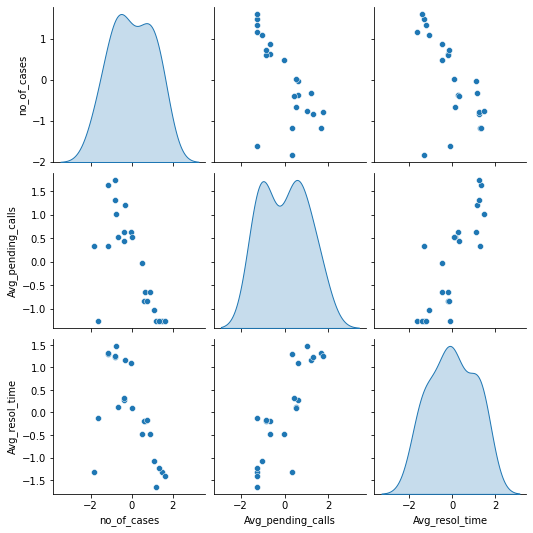

In [6]:
sns.pairplot ( df , diag_kind='kde') ;

#### **Inference**
* Range of K = 2 to 6

### **2.1.2 - Elbow Plot**

In [7]:
from sklearn.cluster import KMeans

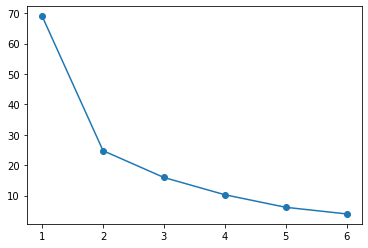

In [8]:
err    = []                      # wcss (within cluster sum square)     # inertia       # total spread

for k in range(1,7):
    
    KM  =  KMeans ( k , n_init =5 , max_iter =1000 , random_state =2 )
    KM.fit(df)            
    err.append    ( KM.inertia_  ) 
    
    
plt.plot  ( range(1,7)  , err  , marker='o') ;

### **2.1.3 - Silhouette Score**

In [9]:
from   sklearn.metrics   import  silhouette_score

In [10]:
scores = []

for k in range(2,13):                                                 

    KM     =  KMeans (n_clusters =k , random_state =2)
    
    labels =  KM.fit_predict (df)

    avg    =  silhouette_score ( df , labels)
    
    scores.append ( {'k':k , 'Avg Silhouette Score':avg} )

In [11]:
table = pd.DataFrame (scores)

table.sort_values ( 'Avg Silhouette Score' , ascending=0)    .head()     .style.hide_index()

k,Avg Silhouette Score
3,0.567310
2,0.544753
4,0.542481
5,0.519545
6,0.507548


### **2.1.4 - Dendrogram**

In [12]:
from sklearn.cluster          import  AgglomerativeClustering 
from scipy.cluster.hierarchy  import  dendrogram, linkage

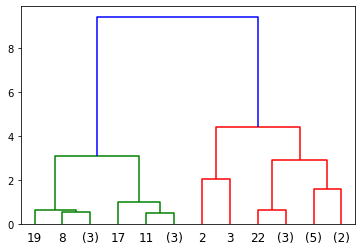

In [13]:
model  =  AgglomerativeClustering  (affinity ='euclidean' ,  linkage ='ward')

model.fit (df)

Z = linkage (df, 'ward')

dendrogram ( Z  ,  p=3  ,  truncate_mode='level')                                               

plt.show()

<a id='section_4'></a>
## **2.2 - Using best K**

| Method | Best K |
| ---    | ---    |
| Elbow  | 2, 3 |         
| Silhouette | 2 , 3 |
| Dendrogram | 2 , 3 |

In [14]:
KM    =  KMeans ( n_clusters=3 )  .fit (df)     

<a id='section_5'></a>
## **2.3 - Cluster labelling of records**

In [15]:
labels        =  KM.predict(df)                                  

df["cluster"] =  labels

<a id='section_6'></a>
## **2.4 - Viewing Clusters**

### **2.4.1 - Pairplot**

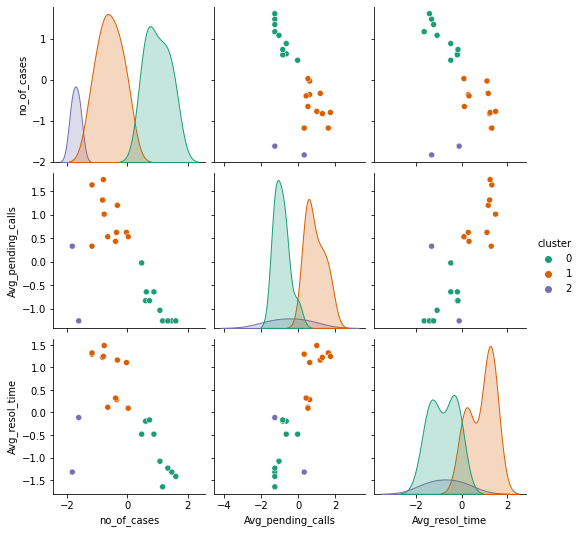

In [16]:
sns.pairplot ( df , diag_kind ='kde' , hue='cluster' , palette='Dark2') ;

### **2.4.2 - Boxplot**

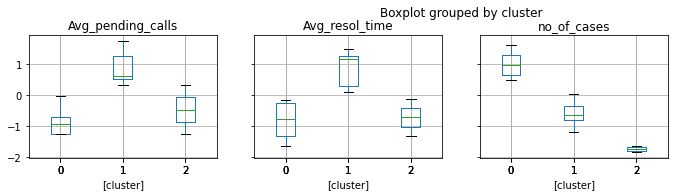

In [17]:
df.boxplot (by='cluster', layout=(2,4) , figsize=(15,5))

plt.show()

### **2.4.3 - Scatterplot**

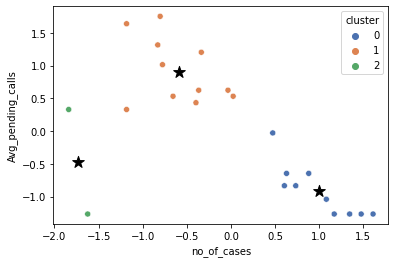

In [18]:
sns.scatterplot ( x='no_of_cases' , y='Avg_pending_calls' , hue='cluster' , data=df , palette='deep') 

plt.scatter ( x = KM.cluster_centers_[:, 0] , y = KM.cluster_centers_[:, 1] , s=150 , c='black' , marker='*' ) ;

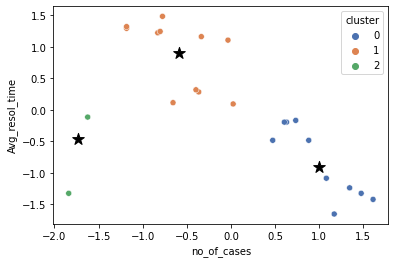

In [19]:
sns.scatterplot ( x='no_of_cases' , y='Avg_resol_time' , hue='cluster' , data=df , palette='deep') 

plt.scatter ( x = KM.cluster_centers_[:, 0] , y = KM.cluster_centers_[:, 1] , s=150 , c='black' , marker='*' ) ;

<a id='section_7'></a>
# **3 - Inference from Clusters**

| Label | Signifies |
| ---    | ---    |
| 0 | Cases high , Pending_Calls low , Resol_time low  |         
| 1 | Cases medium , Pending_Calls high , Resol_time high |
| 2 | Cases low , Pending_Calls low , Resol_time low |